## Data Sources
<ul>
<li> new_clean_data : Cleaned data with dynamic cleaning
<li> new_clean_data_v2 : Every df has the same feature set

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

file_count = len(filenames)

print(file_count)

554


In [24]:
def get_x_y_from_df(df):
    df = df.drop(columns=['Quarter end'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    X = df
    Y = X['Price']
    Y = Y[1:]

    #Getting Next Quarter %change of price 
    #This will be our target variable

    X = X[:-1]
    
    return X,Y

In [44]:
s=1
try:
    df = pd.read_csv("./All_Data/new_clean_data/"+str(filenames[0]), delimiter = ',')
    df.set_index("Unnamed: 0", inplace =True)
except:
    s=2

In [29]:
df

,Quarter end,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Revenue,Earnings,Earnings available for common stockholders,EPS basic,...,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Equity to assets ratio,Net margin,Asset turnover,Current ratio
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2000-01-31,0.030111,0.015054,0.022129,0.057571,0.034775,0.106411,0.267176,0.267176,0.233333,...,-0.131115,-0.476316,0.034274,-0.404659,-0.259179,inf,0.004594,-0.081633,-0.064748,-0.040202
1,2000-04-30,0.030111,0.015054,0.022129,0.057571,0.034775,0.106411,0.267176,0.267176,0.233333,...,-0.131115,-0.476316,0.034274,-0.404659,-0.259179,inf,0.004594,-0.081633,-0.064748,-0.040202
2,2000-07-31,0.069116,0.056753,0.091825,0.148216,0.056010,0.074447,-0.066265,-0.066265,-0.081081,...,-0.131115,-0.476316,0.054581,-0.404659,-0.259179,inf,-0.012301,-0.081633,-0.064748,-0.079666
3,2000-10-31,0.076402,0.058196,0.080342,0.098805,0.074051,0.262921,0.967742,0.967742,0.970588,...,-0.131115,-0.476316,0.066543,-0.317391,-0.259179,inf,-0.002235,-0.081633,-0.064748,-0.036964
4,2001-01-31,0.092938,-0.034306,0.160443,0.113125,0.052422,-0.157473,-0.495082,-0.495082,-0.492537,...,-0.131115,-0.476316,0.051127,-0.023355,-0.259179,inf,-0.036966,-0.081633,-0.064748,-0.132462
5,2001-04-30,-0.013901,-0.084783,-0.055359,0.009121,0.013535,-0.161563,-0.376623,-0.376623,-0.382353,...,-0.131115,-0.476316,0.013190,-0.282609,-0.259179,inf,0.027750,-0.081633,-0.064748,-0.093040
6,2001-07-31,-0.050441,-0.068427,-0.094977,-0.094900,-0.022970,-0.241814,-3.281250,-3.281250,-3.285714,...,-0.539790,-0.476316,-0.030919,-0.169697,-0.075178,inf,0.028941,-0.487302,-0.092308,0.029257
7,2001-10-31,-0.073765,0.030713,-0.257735,-0.286020,0.031347,-0.243079,-1.652968,-1.652968,-1.645833,...,-0.491028,-0.476316,0.024349,-0.222628,0.621253,inf,0.113451,-0.359133,-0.186441,0.443601
8,2002-01-31,0.063486,0.139196,0.349377,-0.170829,-0.054073,0.043160,-3.202797,-3.202797,-3.193548,...,-2.711538,-2.733668,-0.054098,0.065728,1.040336,inf,-0.110500,0.000000,-0.145833,0.373910


#  Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable

[0.04507499 0.04123457 0.03141488 0.01548408 0.07804438 0.04789143
 0.03096258 0.01965505 0.05598889 0.02613009 0.01182872 0.02902102
 0.05374119 0.01142799 0.08706466 0.04062225 0.01221566 0.00855874
 0.04080646 0.06533212 0.03152404 0.02170659 0.05970551 0.01960665
 0.08218617 0.03277129]


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


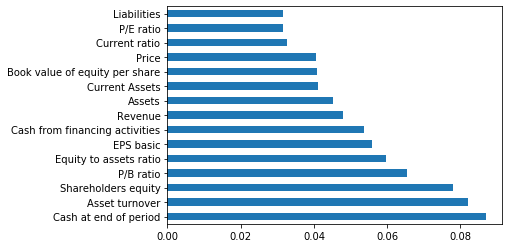

In [32]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
x,y = get_x_y_from_df(df)
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')

plt.show()

In [33]:
feat_importances.nlargest(15).index

Index(['Cash at end of period', 'Asset turnover', 'Shareholders equity',
       'P/B ratio', 'Equity to assets ratio', 'EPS basic',
       'Cash from financing activities', 'Revenue', 'Assets', 'Current Assets',
       'Book value of equity per share', 'Price', 'Current ratio', 'P/E ratio',
       'Liabilities'],
      dtype='object')

In [34]:
'''
NOW ONLY TAKING THE TOP 15 FEATURES
'''

x = x[feat_importances.nlargest(15).index]
np.shape(x)

(48, 15)

## correlation studies

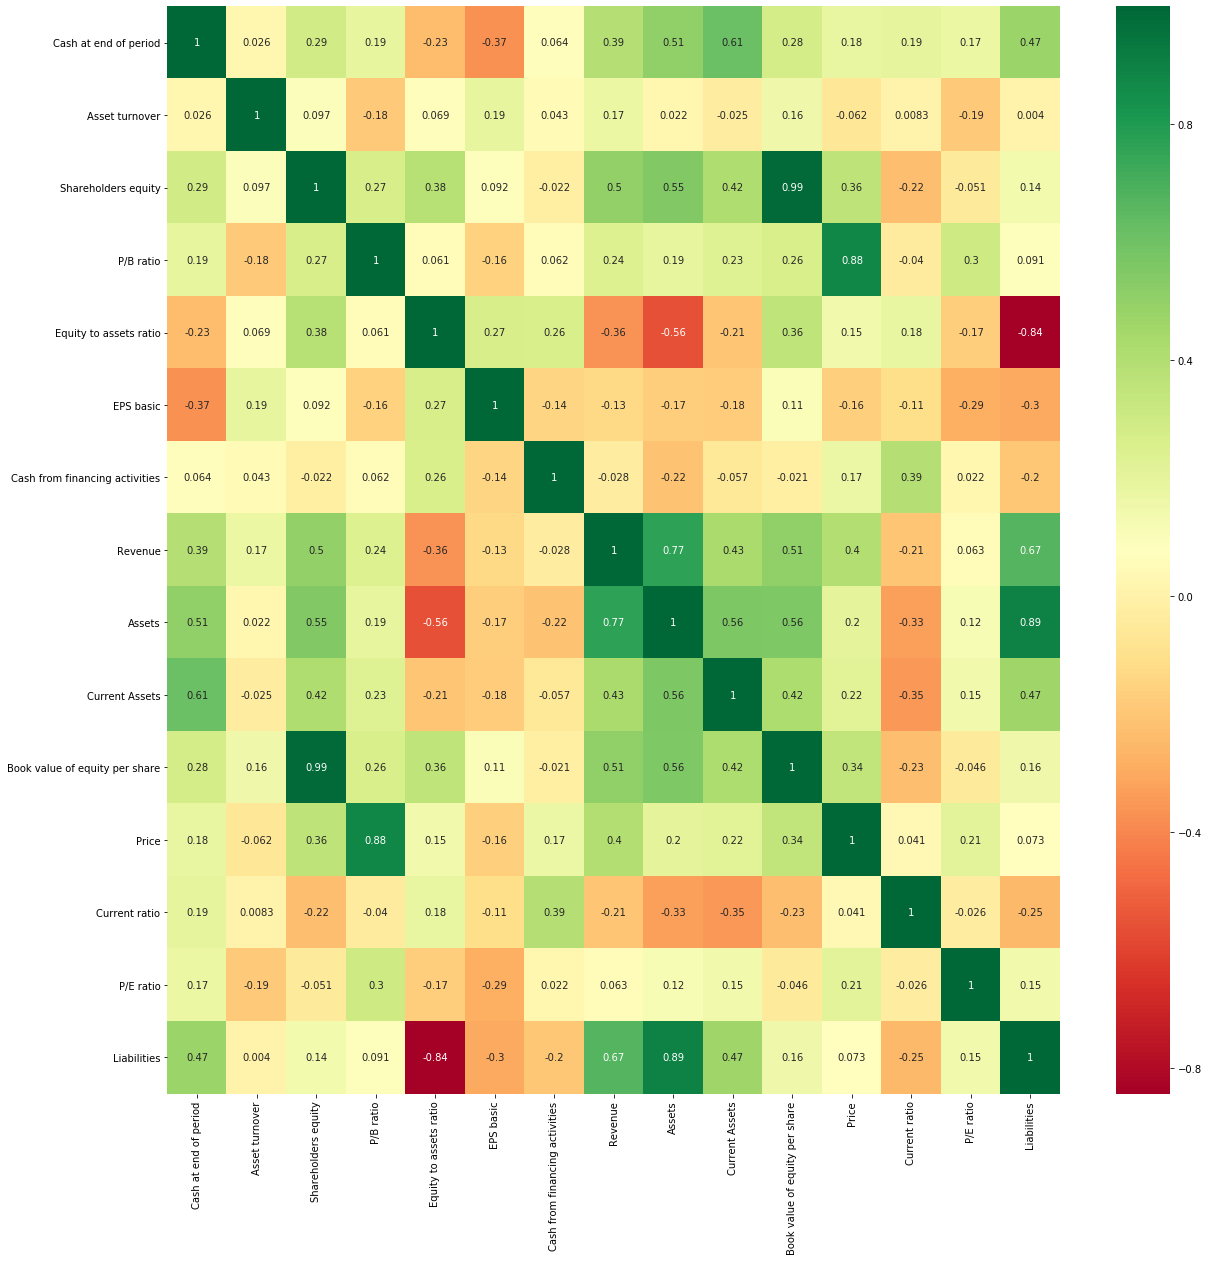

In [35]:
import seaborn as sns
# Create correlation matrix
corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

top_corr_features = corr_matrix.index

plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(x[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [36]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['Book value of equity per share']

In [37]:
# Drop features 
x = x.drop(x[to_drop], axis=1)
x

,Cash at end of period,Asset turnover,Shareholders equity,P/B ratio,Equity to assets ratio,EPS basic,Cash from financing activities,Revenue,Assets,Current Assets,Price,Current ratio,P/E ratio,Liabilities
Unnamed: 0,,,,,,,,,,,,,,
29,-0.019139,0.000000,-0.027892,-0.029255,-0.039929,-0.162162,0.893491,0.031250,0.012512,0.011203,-0.019590,-0.107228,3.508299,0.054299
30,-0.275122,0.000000,-0.075105,0.142466,-0.040975,0.516129,0.512500,0.040909,-0.035562,-0.134529,0.132607,-0.109326,0.103543,0.002146
31,0.228802,0.153846,-0.016423,-0.007194,-0.085452,0.021277,-0.985537,0.052402,0.075456,0.118866,-0.057471,0.015970,0.000417,0.156317
32,-0.241512,0.000000,-0.018862,-0.036232,-0.006307,-0.333333,23.000000,-0.036653,-0.012576,0.381095,-0.014464,-0.141110,-0.083368,-0.007870
33,0.234657,0.013333,-0.005358,-0.082707,-0.033145,0.500000,-1.011905,0.045226,0.028824,0.022682,-0.084317,-0.101582,-0.054116,0.054130
34,-0.040936,0.000000,0.009189,0.060109,0.026988,-0.020833,-89.000000,-0.008242,-0.017331,-0.021408,0.066939,0.029294,-0.039904,-0.035857
35,-0.143293,0.013158,-0.196546,-0.190722,-0.185369,0.382979,1.454545,0.025623,-0.013791,-0.367757,-0.175258,0.380882,-0.175263,0.119835
36,-0.030605,-0.038961,0.004689,-0.127389,0.043301,-0.723077,-0.886574,-0.212694,-0.036977,-0.062344,-0.288929,0.099459,-0.357013,-0.058836
37,0.027900,-0.027027,-0.059121,-0.222628,0.024791,-2.611111,0.653061,-0.064322,-0.081821,-0.041556,-0.203415,-0.014501,-0.144476,-0.094533


In [38]:
np.shape(x)

(48, 14)

# Making the Feature Selection Function

In [58]:
from sklearn.ensemble import ExtraTreesRegressor


def feature_selection(df):
    '''
    input: dataframe 
    
    Feature selection steps
    
    1. Feature Importance 
    
    The feature importance is used from ExtraTreesRegressor, Top 15 features selected
    
    2. Correlation
    
    Features with correlation > 90% are eliminated
    '''
    
    x,y = get_x_y_from_df(df)
    
    model = ExtraTreesRegressor()
    model.fit(x,y)
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    
    '''
    NOW ONLY TAKING THE TOP 15 FEATURES
    '''

    x = x[feat_importances.nlargest(15).index]
    
    '''
    Correlation Matrix
    '''
    corr_matrix = x.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    top_corr_features = corr_matrix.index
    
    '''
    DROP FEATURES WITH CORRELATION > 90%
    '''
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
    
    x = x.drop(x[to_drop], axis=1)
    y = y.rename('Label')
    
    df = pd.concat([x,y], axis = 1)
    
    return df

In [59]:
dataset = feature_selection(df)

/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Running Feature Selection on All

In [61]:
for filename in filenames:
    s=1
    try:
        df = pd.read_csv("./All_Data/new_clean_data/"+str(filename), delimiter = ',')
        df.set_index("Unnamed: 0", inplace =True)
        dataset = feature_selection(df)
        if len(dataset)>=75:
            print("Done file "+str(filename))
            df.to_csv(r'./All_Data/feature_clean_data/'+str(filename))
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file AAN_quarterly_financial_data.csv
Done file AAPL_quarterly_financial_data.csv
Done file ABMD_quarterly_financial_data.csv
Done file ABT_quarterly_financial_data.csv
Done file ADBE_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file ADM_quarterly_financial_data.csv
Done file ADSK_quarterly_financial_data.csv
Done file AEE_quarterly_financial_data.csv
Done file AEP_quarterly_financial_data.csv
Done file AFL_quarterly_financial_data.csv
Done file AJG_quarterly_financial_data.csv
Done file AKRX_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file ALL_quarterly_financial_data.csv
Done file ALXN_quarterly_financial_data.csv
Done file AME_quarterly_financial_data.csv
Done file AMG_quarterly_financial_data.csv
Done file AMGN_quarterly_financial_data.csv
Done file AMT_quarterly_financial_data.csv
Done file AMZN_quarterly_financial_data.csv
Done file AN_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file AOC_quarterly_financial_data.csv
Done file APA_quarterly_financial_data.csv
Done file APC_quarterly_financial_data.csv
Done file APD_quarterly_financial_data.csv
Done file ARE_quarterly_financial_data.csv
Done file AA_quarterly_financial_data.csv
Done file ARW_quarterly_financial_data.csv
Done file AVP_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file AVY_quarterly_financial_data.csv
Done file AXP_quarterly_financial_data.csv
Done file AZO_quarterly_financial_data.csv
Done file BA_quarterly_financial_data.csv
Done file BAC_quarterly_financial_data.csv
Done file BAX_quarterly_financial_data.csv
Done file BBBY_quarterly_financial_data.csv
Done file BBT_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file BC_quarterly_financial_data.csv
Done file BEN_quarterly_financial_data.csv
Done file BF.B_quarterly_financial_data.csv
Done file BIG_quarterly_financial_data.csv
Done file BIIB_quarterly_financial_data.csv
Done file BLL_quarterly_financial_data.csv
Done file BMY_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file BSX_quarterly_financial_data.csv
Done file BWA_quarterly_financial_data.csv
Done file C_quarterly_financial_data.csv
Done file CAG_quarterly_financial_data.csv
Done file CAT_quarterly_financial_data.csv
Done file ACE_quarterly_financial_data.csv
Done file CCI_quarterly_financial_data.csv
Done file CCL_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file CDNS_quarterly_financial_data.csv
Done file CELG_quarterly_financial_data.csv
Done file CERN_quarterly_financial_data.csv
Done file CHD_quarterly_financial_data.csv
Done file CIEN_quarterly_financial_data.csv
Done file CINF_quarterly_financial_data.csv
Done file CL_quarterly_financial_data.csv
Done file CLF_quarterly_financial_data.csv
Done file CMA_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file CMI_quarterly_financial_data.csv
Done file CMS_quarterly_financial_data.csv
Done file CNX_quarterly_financial_data.csv
Done file COF_quarterly_financial_data.csv
Done file COG_quarterly_financial_data.csv
Done file COO_quarterly_financial_data.csv
Done file CPB_quarterly_financial_data.csv
Done file CR_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file CSCO_quarterly_financial_data.csv
Done file CSX_quarterly_financial_data.csv
Done file CTAS_quarterly_financial_data.csv
Done file CTSH_quarterly_financial_data.csv
Done file D_quarterly_financial_data.csv
Done file DAL_quarterly_financial_data.csv
Done file DCI_quarterly_financial_data.csv
Done file DDS_quarterly_financial_data.csv
Done file DE_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file DHI_quarterly_financial_data.csv
Done file DHR_quarterly_financial_data.csv
Done file DLTR_quarterly_financial_data.csv
Done file DOV_quarterly_financial_data.csv
Done file DRE_quarterly_financial_data.csv
Done file DRI_quarterly_financial_data.csv
Done file DTE_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file DVA_quarterly_financial_data.csv
Done file EBAY_quarterly_financial_data.csv
Done file ECL_quarterly_financial_data.csv
Done file ED_quarterly_financial_data.csv
Done file EFX_quarterly_financial_data.csv
Done file EIX_quarterly_financial_data.csv
Done file EOG_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file EQIX_quarterly_financial_data.csv
Done file EQR_quarterly_financial_data.csv
Done file EQT_quarterly_financial_data.csv
Done file ESS_quarterly_financial_data.csv
Done file ESV_quarterly_financial_data.csv
Done file ETFC_quarterly_financial_data.csv
Done file EW_quarterly_financial_data.csv
Done file F_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file FDS_quarterly_financial_data.csv
Done file FE_quarterly_financial_data.csv
Done file FFIV_quarterly_financial_data.csv
Done file FII_quarterly_financial_data.csv
Done file FISV_quarterly_financial_data.csv
Done file FLIR_quarterly_financial_data.csv
Done file FLR_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file FLS_quarterly_financial_data.csv
Done file FRT_quarterly_financial_data.csv
Done file GD_quarterly_financial_data.csv
Done file GE_quarterly_financial_data.csv
Done file WPO_quarterly_financial_data.csv
Done file GIS_quarterly_financial_data.csv
Done file GLW_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file GPC_quarterly_financial_data.csv
Done file GPS_quarterly_financial_data.csv
Done file GT_quarterly_financial_data.csv
Done file GWW_quarterly_financial_data.csv
Done file HAL_quarterly_financial_data.csv
Done file HAS_quarterly_financial_data.csv
Done file HBAN_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file HCP_quarterly_financial_data.csv
Done file HD_quarterly_financial_data.csv
Done file HIBB_quarterly_financial_data.csv
Done file HIG_quarterly_financial_data.csv
Done file HOLX_quarterly_financial_data.csv
Done file HON_quarterly_financial_data.csv
Done file HP_quarterly_financial_data.csv
Done file HPQ_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file HRB_quarterly_financial_data.csv
Done file HRL_quarterly_financial_data.csv
Done file HSY_quarterly_financial_data.csv
Done file HUM_quarterly_financial_data.csv
Done file IBM_quarterly_financial_data.csv
Done file IDXX_quarterly_financial_data.csv
Done file ILMN_quarterly_financial_data.csv
Done file INCY_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file INTC_quarterly_financial_data.csv
Done file INTU_quarterly_financial_data.csv
Done file IP_quarterly_financial_data.csv
Done file IPG_quarterly_financial_data.csv
Done file IRM_quarterly_financial_data.csv
Done file ISRG_quarterly_financial_data.csv
Done file IT_quarterly_financial_data.csv
Done file ITT_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file ITW_quarterly_financial_data.csv
Done file JBHT_quarterly_financial_data.csv
Done file JCI_quarterly_financial_data.csv
Done file LUK_quarterly_financial_data.csv
Done file JNJ_quarterly_financial_data.csv
Done file JWN_quarterly_financial_data.csv
Done file K_quarterly_financial_data.csv
Done file KBH_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file KEY_quarterly_financial_data.csv
Done file KIM_quarterly_financial_data.csv
Done file KMB_quarterly_financial_data.csv
Done file KO_quarterly_financial_data.csv
Done file KSS_quarterly_financial_data.csv
Done file KSU_quarterly_financial_data.csv
Done file LTD_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file LEN_quarterly_financial_data.csv
Done file LLY_quarterly_financial_data.csv
Done file LMT_quarterly_financial_data.csv
Done file LNC_quarterly_financial_data.csv
Done file LNT_quarterly_financial_data.csv
Done file LOW_quarterly_financial_data.csv
Done file LUV_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file MAA_quarterly_financial_data.csv
Done file MAS_quarterly_financial_data.csv
Done file MAT_quarterly_financial_data.csv
Done file MCK_quarterly_financial_data.csv
Done file MDT_quarterly_financial_data.csv
Done file MKC_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file MLM_quarterly_financial_data.csv
Done file MMC_quarterly_financial_data.csv
Done file MMM_quarterly_financial_data.csv
Done file MO_quarterly_financial_data.csv
Done file MOT_quarterly_financial_data.csv
Done file MTD_quarterly_financial_data.csv
Done file MU_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file MYL_quarterly_financial_data.csv
Done file NAV_quarterly_financial_data.csv
Done file NBL_quarterly_financial_data.csv
Done file FPL_quarterly_financial_data.csv
Done file NKE_quarterly_financial_data.csv
Done file NOV_quarterly_financial_data.csv
Done file NSC_quarterly_financial_data.csv
Done file NTAP_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file NTRS_quarterly_financial_data.csv
Done file NVDA_quarterly_financial_data.csv
Done file NWL_quarterly_financial_data.csv
Done file OI_quarterly_financial_data.csv
Done file OKE_quarterly_financial_data.csv
Done file OMC_quarterly_financial_data.csv
Done file ORCL_quarterly_financial_data.csv
Done file OXY_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-pa

Done file PAYX_quarterly_financial_data.csv
Done file PCAR_quarterly_financial_data.csv
Done file PDCO_quarterly_financial_data.csv
Done file PEG_quarterly_financial_data.csv
Done file PEP_quarterly_financial_data.csv
Done file PHM_quarterly_financial_data.csv
Done file PLD_0_quarterly_financial_data.csv


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
